**LOGISTIC REGGRESSION:**
In this notebook we are going to apply logistic regression which is an algorithm comes under the classification regression in which our target variable is classified in certain categories we can call them categorical values. These values falls under discrete values which also means the values which are not continous.

In this step we are going to install all the libraries required to use the function to perform the desired task.

In [0]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


We have used pandas library to read the train dataset from the directory

In [0]:
#Importing test dataset:
titanic_data_train = pd.read_csv("train_data.csv")

We have used pandas library to read the test dataset from the directory

In [0]:
titanic_data_test = pd.read_csv("test_data.csv")

Taking overview of the train dataset is very important, this tell us how our data looks like. Certainly there are many different ways to explore everyone has there own choice what approach they use explore data.

In [35]:
titanic_data_train.head(10)

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1
5,5,6,0,1,0.3500,0.016510,0,0,1,0.0,1,0,0,0,0,1,0
6,6,7,0,1,0.6750,0.101229,1,0,0,0.0,1,0,0,0,0,0,1
7,7,8,0,1,0.0250,0.041136,0,0,1,0.4,0,0,1,0,0,0,1
8,8,9,1,0,0.3375,0.021731,0,0,1,0.2,1,0,0,0,0,0,1
9,9,10,1,0,0.1750,0.058694,0,1,0,0.1,1,0,0,0,1,0,0


Taking overview of the test dataset is very important, this tell us how our data looks like. Certainly there are many different ways to explore everyone has there own choice what approach they use explore data.

In [36]:
titanic_data_test.head(10)

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
5,796,797,1,0,0.6125,0.050610,1,0,0,0.0,0,1,0,0,0,0,1
6,797,798,1,0,0.3875,0.016949,0,0,1,0.0,1,0,0,0,0,0,1
7,798,799,0,1,0.3750,0.014110,0,0,1,0.0,1,0,0,0,1,0,0
8,799,800,0,0,0.3750,0.047138,0,0,1,0.2,1,0,0,0,0,0,1
9,800,801,0,1,0.4250,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


It is very important to know the dimensions of dataset how exactly big or small it. This function is applied on both train and test dataset.

In [37]:
titanic_data_train.shape

(792, 17)

In [38]:
titanic_data_test.shape

(100, 17)

As we are aware that collecting data is sometimes dont goes well, due to which data sometime goes missing and while exploring the data we notice that many of the columns are not going to make any difference in outcome of model. To increase the efficientcy and more accurate results we remove some column which are totaly discrete decision based on the domain knowledge as pe my understanding. In the next steps we have drop 2 columns which we found of no significant impact. 

In [0]:
#Dropping unproductive table
titanic_data_train.drop("Unnamed: 0",axis=1, inplace= True)

In [0]:
titanic_data_test.drop("Unnamed: 0",axis=1, inplace= True)

In [0]:
titanic_data_train.drop("PassengerId",axis=1, inplace= True)

In [0]:
titanic_data_test.drop("PassengerId",axis=1, inplace= True)

#Exploratory Data Analysis

After removing the column looking at the dataset.

In [43]:
titanic_data_train.head(10)

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1
5,0,1,0.3500,0.016510,0,0,1,0.0,1,0,0,0,0,1,0
6,0,1,0.6750,0.101229,1,0,0,0.0,1,0,0,0,0,0,1
7,0,1,0.0250,0.041136,0,0,1,0.4,0,0,1,0,0,0,1
8,1,0,0.3375,0.021731,0,0,1,0.2,1,0,0,0,0,0,1
9,1,0,0.1750,0.058694,0,1,0,0.1,1,0,0,0,1,0,0


In [44]:
titanic_data_train.Survived.value_counts()

0    486
1    306
Name: Survived, dtype: int64

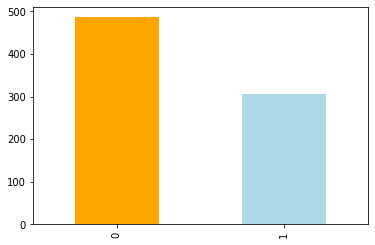

In [45]:
titanic_data_train["Survived"].value_counts().plot(kind = "bar",
                                                   color = ["orange", "lightblue"]);

In [46]:
titanic_data_train.isna().sum()

Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64

In [47]:
titanic_data_train.describe()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,0.386364,0.647727,0.368244,0.064677,0.243687,0.208333,0.547980,0.088636,0.744949,0.005051,0.040404,0.209596,0.185606,0.092172,0.720960
std,0.487223,0.477980,0.162994,0.100987,0.429577,0.406373,0.498007,0.154485,0.436165,0.070932,0.197029,0.407277,0.389034,0.289451,0.448811
min,0.000000,0.000000,0.008375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.275000,0.015469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.350000,0.028302,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.437500,0.061045,0.000000,0.000000,1.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


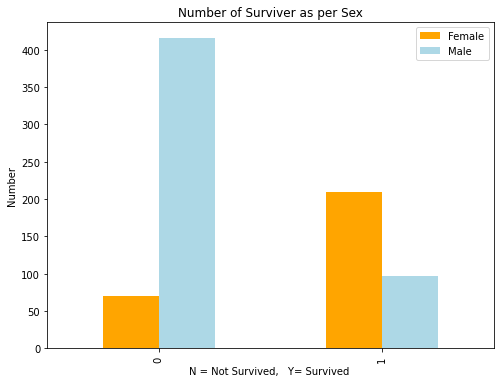

In [48]:
#Plot of cross tab
pd.crosstab(titanic_data_train.Survived, titanic_data_train.Sex).plot(kind = "bar",
                                                       figsize=(8,6),
                                                       color= ["orange","lightblue"])
plt.title("Number of Surviver as per Sex")
plt.xlabel("N = Not Survived,   Y= Survived ")
plt.ylabel("Number")
plt.legend(["Female", "Male"]);

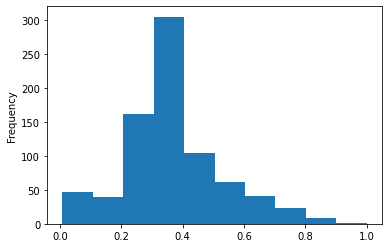

In [49]:
titanic_data_train.Age.plot.hist();

##Correlation Matrix

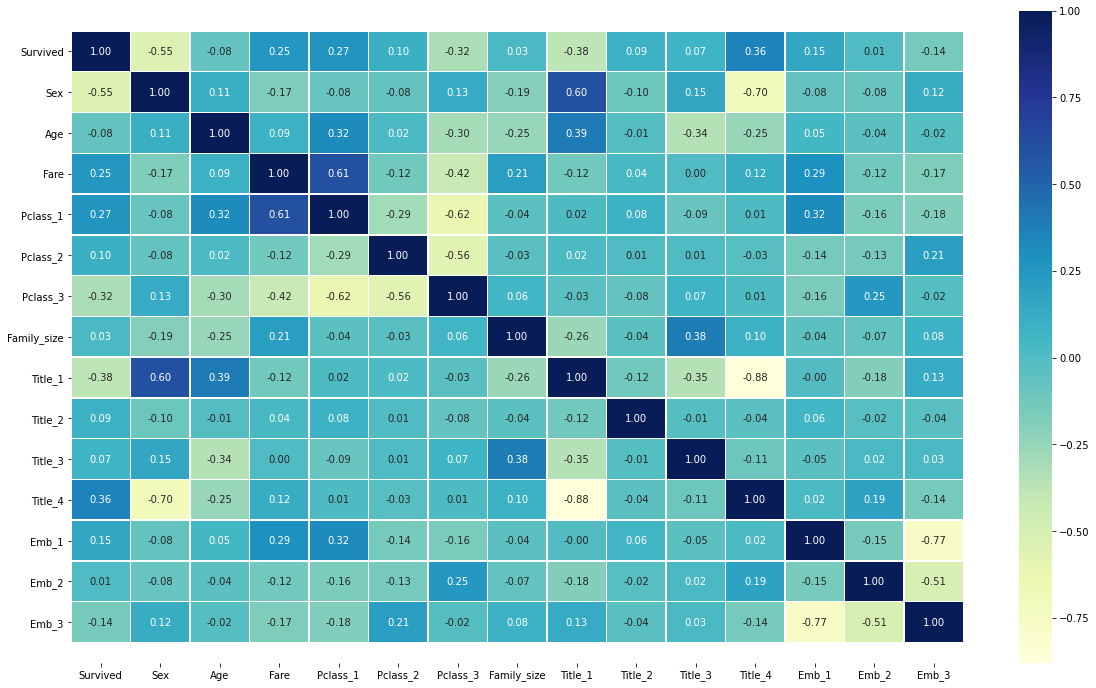

In [50]:
#Graphical Represenation of correlation matrix
corr_matrix= titanic_data_train.corr()

fig, ax = plt.subplots(figsize = (20,12))

ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth = 0.5,
              fmt= ".2f",
              cmap = "YlGnBu")
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top - 0.5);

As per our earlier analysis we can see that our data is totaly clean and normalised columns with one hot encoding already performed. I found that our model is ready to apply the logistic regression model. In this step we have split our data set into dependent variable "y" and independent variable "X" for both test dataset and train dataset.

In [0]:
X_train = titanic_data_train.drop("Survived", axis=1)
y_train = titanic_data_train["Survived"]

In [0]:
X_test = titanic_data_test.drop("Survived", axis=1)
y_test = titanic_data_test["Survived"]

#Applying PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [71]:
explained_variance

array([0.553188, 0.446812])

In [55]:
X_train

array([[-0.62911428, -0.47977094],
       [ 0.58115931,  1.11850823],
       [ 0.98099792, -0.84853955],
       ...,
       [ 0.00179551,  1.16565611],
       [-0.29852481, -0.49216745],
       [-0.52073203,  0.4460687 ]])

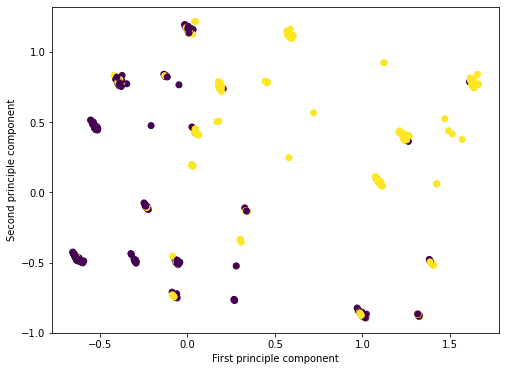

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], c = titanic_data_train["Survived"])
plt.xlabel("First principle component")
plt.ylabel("Second principle component");

In [56]:
X_test

array([[-0.52073203,  0.4460687 ],
       [ 1.02265548, -0.8669597 ],
       [ 0.00855966,  1.13474677],
       [-0.6346239 , -0.47270592],
       [-0.53521516,  0.47432637],
       [ 0.70692682,  0.57794853],
       [-0.06658449, -0.49713459],
       [-0.23950299, -0.09619205],
       [-0.05718832, -0.50218637],
       [-0.53228678,  0.46775982],
       [ 0.04960021,  0.42732263],
       [ 0.17084094,  0.51431066],
       [ 0.31378586, -0.37023764],
       [-0.63586698, -0.47021731],
       [-0.63814737, -0.46484417],
       [-0.39837492,  0.77454526],
       [ 0.98567165, -0.8590685 ],
       [-0.53521516,  0.47432637],
       [ 0.18457016,  0.73916915],
       [-0.63521022, -0.47139385],
       [-0.64155732, -0.45188342],
       [-0.53306718,  0.46869843],
       [ 1.01734753, -0.88947589],
       [-0.63783311, -0.46545961],
       [-0.39193248,  0.76009886],
       [ 0.98275495, -0.85247947],
       [-0.12295305,  0.83140825],
       [-0.64527869, -0.44928306],
       [-0.07320479,

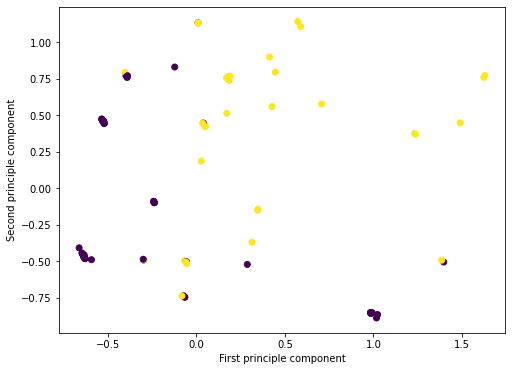

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c = titanic_data_test["Survived"])
plt.xlabel("First principle component")
plt.ylabel("Second principle component");

#Fitting Logistic Regression

We have imported logistic Regression from sklearn library. We have fixed random state to a random number as 42 it can be anytime we can also put 0. There might be certain indeepth computation to decide these numbers but at this level we are not required to follow at. The use of this parameter is to stop showing results different everytime we run the code. 

We have fit the model to dependent and independent varibles of training dataset. 

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Making the Confusion Matrix

In [63]:
#Predicting the test set results
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[54 10]
 [16 20]]


0.74

## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


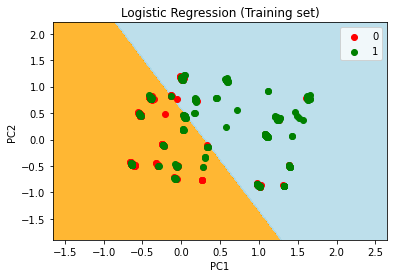

In [68]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.80, cmap = ListedColormap(('Orange', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('Red', 'Green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


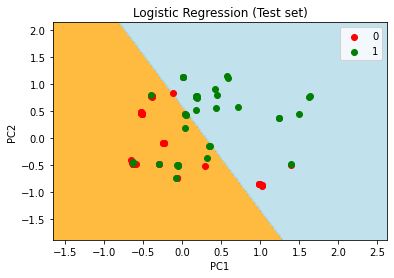

In [69]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('Orange', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('Red', 'Green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()